In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


# Import dataset

In [ ]:
cols =["Length","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data" ,names=cols)
df.head(10)

,Length,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [ ]:
# https://www.youtube.com/watch?v=i_LwzRVP7bg&t=39s
df["class"] = (df["class"]== "g").astype(int)
df.head(6)


,Length,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1


In [ ]:
df.describe()

,Length,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


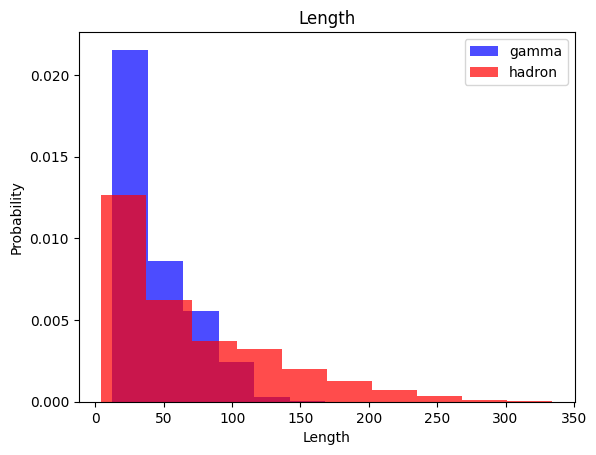

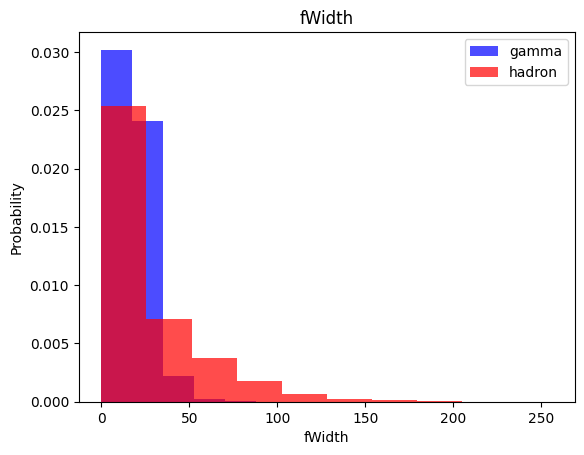

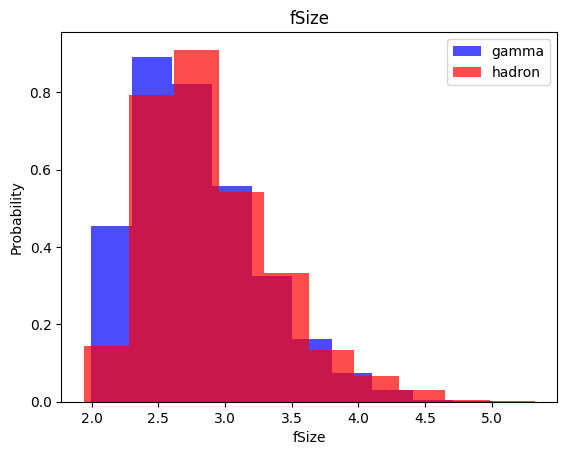

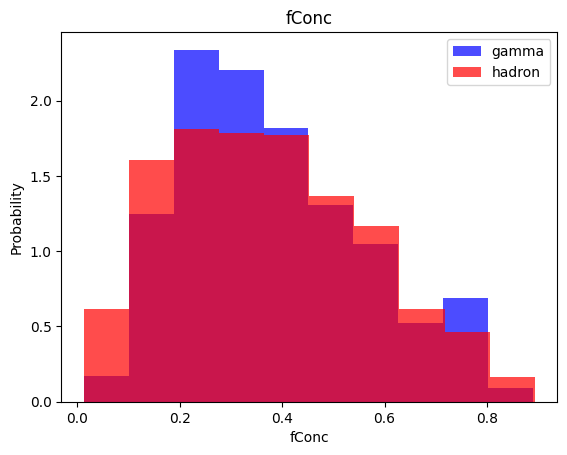

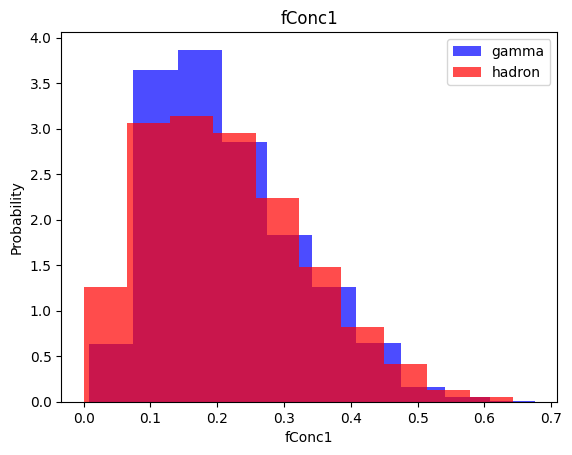

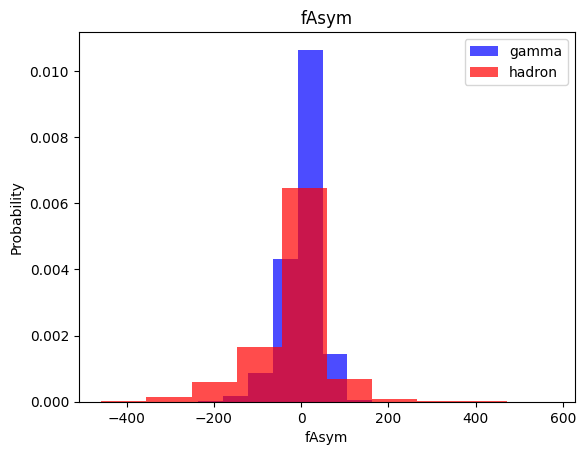

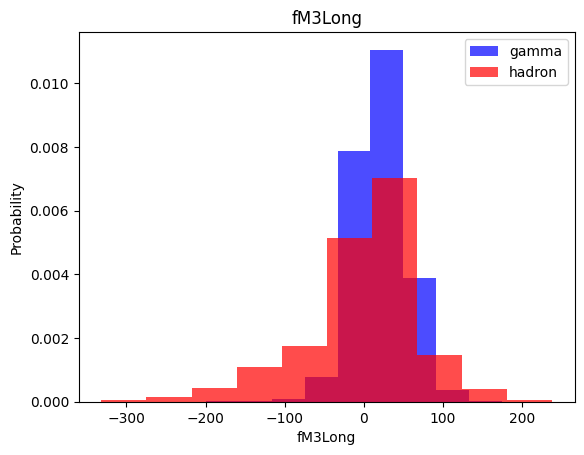

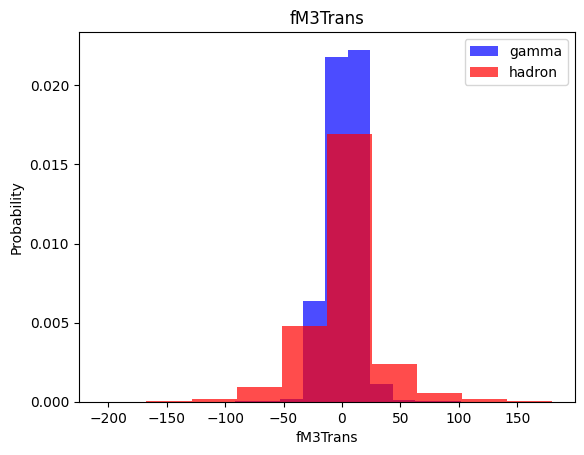

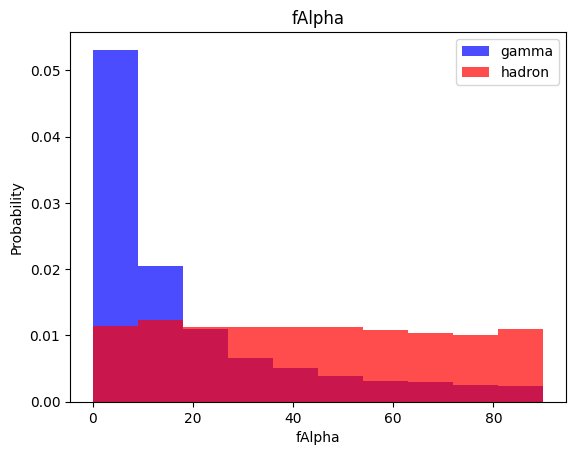

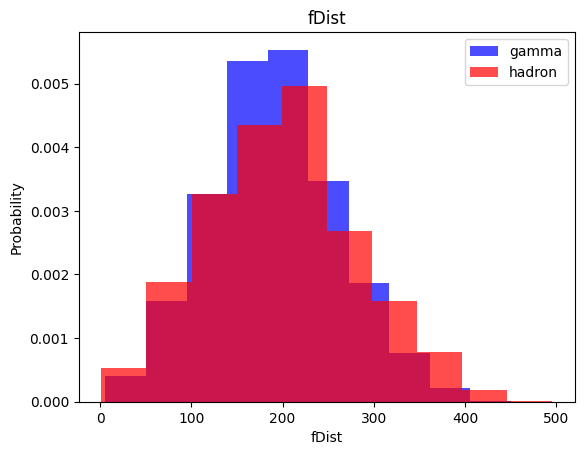

In [47]:
import  matplotlib.pyplot as plt
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [48]:
train ,valid ,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


/home/drosa/Documents/dataScience/PythonDataScienceHandbook/dataBookPython/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [49]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

Die euklidische Distanz (engl. Euclidean distance) ist ein Maß für den "Luftlinienabstand" zwischen zwei Punkten im Raum und wird häufig in Algorithmen wie K-Means verwendet, um die Ähnlichkeit bzw. Nähe zwischen Datenpunkten zu bestimmen.
🔍 Definition (mathematisch)

Für zwei Punkte x=(x1,x2,...,xn)x=(x1​,x2​,...,xn​) und y=(y1,y2,...,yn)y=(y1​,y2​,...,yn​) im n-dimensionalen Raum ist die euklidische Distanz:
d(x,y)=(x1−y1)2+(x2−y2)2+...+(xn−yn)2
d(x,y)=(x1​−y1​)2+(x2​−y2​)2+...+(xn​−yn​)2
​
🧠 Im Kontext von K-Means

Der K-Means-Algorithmus gruppiert Datenpunkte in kk Cluster, basierend auf ihrer Ähnlichkeit. Dabei spielt die euklidische Distanz eine zentrale Rolle:

    Zuweisung zu Clustern:
    Jeder Datenpunkt wird dem Cluster zugeordnet, dessen Mittelpunkt (Centroid) die geringste euklidische Distanz zum Punkt hat.

    Berechnung neuer Zentren:
    Nach der Zuordnung wird das neue Cluster-Zentrum als Mittelwert aller Punkte im Cluster berechnet – dieser Schritt hängt ebenfalls indirekt von der euklidischen Distanz ab, da sie optimal bei Mittelwertminimierung wirkt.

# What Does “Rescale” Mean in Machine Learning?

Rescaling (or feature scaling) means transforming the input features (X) so that they are on a similar scale — typically zero mean and unit variance or within a fixed range (like [0, 1]).

This is important because:

    Many ML algorithms (e.g., logistic regression, SVM, KNN) work better or converge faster when features are scaled.

    Without scaling, features with larger ranges (like income) dominate those with smaller ranges (like age).

scaler = StandardScaler()
X = scaler.fit_transform(X)

This standardizes the data (Z-score normalization):
X′=X−μσ
X′=σX−μ​

Where:

    μμ is the mean of the feature

    σσ is the standard deviation of the feature

    Result: each feature has mean = 0 and std = 1

## we can expand to do it with 10 dimension , 10 features ,categories auch 

In [50]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [51]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
kmn_model = KNeighborsClassifier(n_neighbors=1)
kmn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred= kmn_model.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

## accuracy ist 80  how often overall was the model right  
# out of all hiw many were actually positiv 
#
# f1 harmonic mean of precision and recall 
# precision how many predcut provis were actually correct 
# to calculatep rovabily if  the model predicts 500 and  the actual nr of psotives is 550 
# bayerns regeln
# then teh rpobabiltiy if the mdoel predict postive that it is actual positive it is 500/550 = 90%

              precision    recall  f1-score   support

           0       0.77      0.67      0.71      1329
           1       0.83      0.89      0.86      2475

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# #

# bayerns regeln
#### then teh probabiltiy if the mdoel predict postive that it is actual positive it is 500/550 = 90s

What is Naive Bayes?

Naive Bayes is a probabilistic classifier based on Bayes’ Theorem with the naive assumption that features are independent given the class.

It works well for:

    Text classification (spam detection, sentiment analysis)

    Medical diagnosis

    Simple but high-dimensional problems

📘 Bayes’ Theorem (Core Idea)
P(C∣X)=P(X∣C)⋅P(C)P(X)
P(C∣X)=P(X)P(X∣C)⋅P(C)​

Where:

    P(C∣X)P(C∣X): probability of class C given features X

    P(X∣C)P(X∣C): likelihood of features X given class C

    P(C)P(C): prior probability of class C

    P(X)P(X): total probability of features (same for all classes → can be ignored in practice)

Naive Assumption:
P(X1,X2,…,Xn∣C)≈P(X1∣C)⋅P(X2∣C)⋅⋯⋅P(Xn∣C)
P(X1​,X2​,…,Xn​∣C)≈P(X1​∣C)⋅P(X2​∣C)⋅⋯⋅P(Xn​∣C)

Each feature is treated as independent from the others given the class.

In [54]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
# it gets worst result because of the  
# we are only stimating the probability, for any values 
# one of the rules isthat thre probability needs to change 

              precision    recall  f1-score   support

           0       0.69      0.41      0.52      1329
           1       0.74      0.90      0.81      2475

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# we ant to fit our data to afucntion like sigmoid function 
 What is the Sigmoid Function?

The sigmoid function is a mathematical function that maps any real-valued number to a range between 0 and 1:
σ(x)=11+e−x
σ(x)=1+e−x1​

    Output is always between 0 and 1

    It’s S-shaped (like an "S" curve)

✅ Why Is the Sigmoid Function Useful in Classification?
1. Probability Output

The sigmoid function converts raw model output (logits) into a probability.

    For binary classification, the output can be interpreted as the probability of the class being 1 (positive class).

2. Decision Threshold

You can classify based on a threshold:

    If σ(x)>0.5σ(x)>0.5: predict class 1

    Else: predict class 0

3. Differentiable & Smooth

It works well with gradient-based optimization (like in logistic regression or neural networks) because it’s smooth and differentiable everywhere.

In [55]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [56]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1329
           1       0.85      0.82      0.83      2475

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# best ilne to divide the groups , the clasificaiton objects, is a vector in more dimension that one 

# A Support Vector Classifier (SVC) 
is a type of supervised machine learning algorithm used for classification tasks. It works by finding the optimal hyperplane (a line in 2D, a plane in 3D, or a higher-dimensional equivalent) that best separates different classes in the data. This "best" separation is defined by maximizing the margin, which is the distance between the hyperplane and the closest data points of each class. 
Support Vector Machines: A Simple Explanation - KDnuggets
Here's a more detailed explanation:
Key Concepts:

    Hyperplane: A decision boundary that separates data points into different classes. 

Margin: The distance between the hyperplane and the closest data points of each class. 
Support Vectors: The data points that are closest to the hyperplane and define the margin. 
Linear vs. Non-linear: SVC can handle both linearly separable data (where a straight line can separate the classes) and non-linearly separable data (where a curve or more complex boundary is needed). 
Kernel Trick: When data is not linearly separable, SVC uses a kernel function to transform the data into a higher-dimensional space where a linear separation is possible. 

best decision boundary (hyperplane) to separate classes in a dataset.
✳️ Main Goal:

Maximize the margin (distance) between the closest points of each class — called support vectors — and the decision boundary.
🔍 Key Concepts:
Term	Explanation
Hyperplane	The boundary that separates classes (a line in 2D, a plane in 3D, etc.)
Margin	The distance between the hyperplane and the nearest points of both classes
Support Vectors	Data points that lie closest to the hyperplane and influence its position
Kernel	A function that transforms data into higher dimensions to make it separable
📐 How It Works (Visually)

Imagine this:

Class 0: o o o
         ------- ← Hyperplane
Class 1: x x x

SVC finds that line (or surface) that best separates the classes with the widest possible gap.
🔧 Types of Kernels in SVC
Kernel	Description	Use when...
linear	Straight-line separation	Data is linearly separable
rbf	Radial basis function (nonlinear)	Complex, nonlinear boundaries
poly	Polynomial boundary	Intermediate complexity
sigmoid	Similar to neural networks (less common)	Experimental or hybrid models


# all models need to fit and predict 

In [57]:
from sklearn.svm import SVC
#support vector clasifier 
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [58]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1329
           1       0.89      0.90      0.89      2475

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# import tensorflow as tf
TensorFlow operates on multidimensional arrays or tensors represented as tf.Tensor objects. Here is a two-dimensional tensor:

import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

Running large calculations on CPU can be slow. When properly configured, TensorFlow can use accelerator hardware like GPUs to execute operations very quickly.

if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")
  Variables
Normal tf.Tensor objects are immutable. To store model weights (or other mutable state) in TensorFlow use a tf.Variable.

In [59]:
import tensorflow as tf

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [60]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

16 nodes, dropout 0, lr 0.01, batch size 32


/home/drosa/Documents/dataScience/PythonDataScienceHandbook/dataBookPython/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-16 16:41:04.986194: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


KeyboardInterrupt: 

 Function: train_model(...)

This function defines and trains a neural network using Keras.
Parameters:

    X_train, y_train: Training data and labels

    num_nodes: Number of neurons in the hidden layers

    dropout_prob: Dropout rate to prevent overfitting

    lr: Learning rate for the optimizer

    batch_size: Batch size for training

    epochs: Number of training iterations

Code Steps:

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

    Input layer: 10 features expected per sample

    Two hidden layers with ReLU activation and dropout

    Output layer with 1 neuron and sigmoid (for binary classification)

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

    Optimizer: Adam with given learning rate

    Loss: Binary cross-entropy (used for binary classification)

history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size,
    validation_split=0.2, verbose=0
)

    Trains the model using 80% of X_train for training and 20% for validation

    verbose=0 means no output during training

return nn_model, history

🔄 Grid Search

least_val_loss = float('inf')
least_loss_model = None

    Initializes variables to track the best model (lowest validation loss)

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:

    Iterates over all combinations of hyperparameters (3 × 2 × 3 × 3 = 54 models)

### second MOdel

In [69]:
import pandas as pd 
import numpy as pd
import copy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression



In [70]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("hour.csv").drop(["dteday", "holiday", "season"], axis=1)
df.shape

(17379, 14)

In [72]:
df = pd.read_csv("hour.csv").drop(["dteday", "holiday", "season", "instant"], axis=1)

# Create approximated new columns
df["visibility"] = 1.0 - (df["weathersit"] - 1) * 0.3   # 1=clear → 1.0, 2=mist → 0.7, 3=rain → 0.4
df["dew_pt_temp"] = df["atemp"]                        # use 'atemp' as proxy for dew point
df["radiation"] = 0.0                                  # no data in dataset → fill with 0 or dummy
df["rain"] = (df["weathersit"] >= 3).astype(int)       # weathersit 3 or higher means rain
df["snow"] = (df["weathersit"] == 4).astype(int)       # if present in your dataset

# Add functional status as dummy (since not in dataset)
df["functional"] = 1  # assuming all are functional unless specified elsewhere

# Keep only needed columns
df = df[["cnt", "hr", "temp", "hum", "windspeed", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]]

# Rename columns
df.columns = dataset_cols

# Optional filter: only keep rows at 12:00
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

df = df.drop("radiation", axis=1)



In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 12 to 17367
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   728 non-null    int64  
 1   temp         728 non-null    float64
 2   humidity     728 non-null    float64
 3   wind         728 non-null    float64
 4   visibility   728 non-null    float64
 5   dew_pt_temp  728 non-null    float64
 6   rain         728 non-null    int64  
 7   snow         728 non-null    int64  
 8   functional   728 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 56.9 KB


In [74]:
(
    df
    .isna()
    .sum()
    .loc[lambda s: s > 0]
    # .sort_values()
)
df.isna().sum()

bike_count     0
temp           0
humidity       0
wind           0
visibility     0
dew_pt_temp    0
rain           0
snow           0
functional     0
dtype: int64

In [75]:
df.head()


,bike_count,temp,humidity,wind,visibility,dew_pt_temp,rain,snow,functional
12,84,0.42,0.77,0.2836,1.0,0.4242,0,0,1
35,93,0.36,0.66,0.2985,0.7,0.3333,0,0,1
57,61,0.22,0.35,0.2985,1.0,0.2121,0,0,1
80,78,0.22,0.51,0.1642,1.0,0.2273,0,0,1
103,79,0.26,0.33,0.3284,1.0,0.2273,0,0,1


In [76]:
df.describe()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,rain,snow,functional
count,728.000000,728.000000,728.000000,728.000000,728.00000,728.000000,728.000000,728.0,728.0
mean,253.315934,0.540275,0.536703,0.216013,0.85989,0.512903,0.075549,0.0,1.0
std,145.081134,0.199211,0.175864,0.135704,0.18987,0.178432,0.264458,0.0,0.0
min,3.000000,0.060000,0.000000,0.000000,0.40000,0.075800,0.000000,0.0,1.0
25%,158.000000,0.360000,0.410000,0.104500,0.70000,0.363600,0.000000,0.0,1.0
50%,229.000000,0.540000,0.510000,0.223900,1.00000,0.515200,0.000000,0.0,1.0
75%,322.250000,0.700000,0.642500,0.298500,1.00000,0.651500,0.000000,0.0,1.0
max,776.000000,0.960000,1.000000,0.716400,1.00000,0.954500,1.000000,0.0,1.0


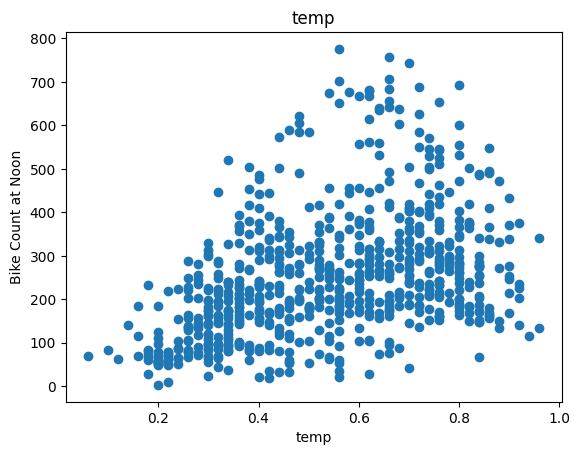

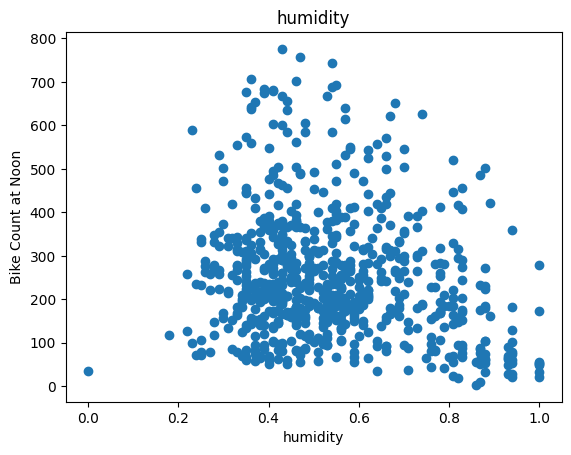

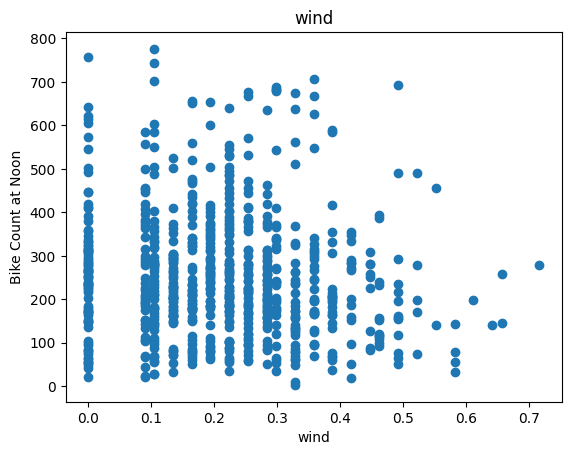

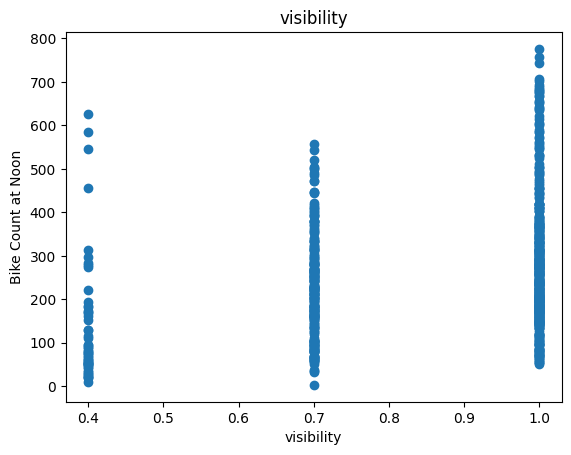

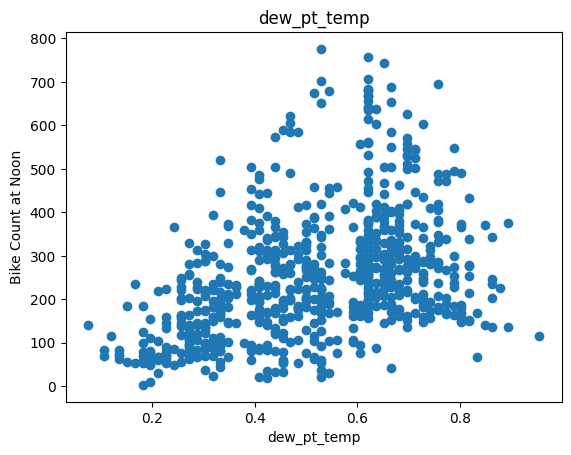

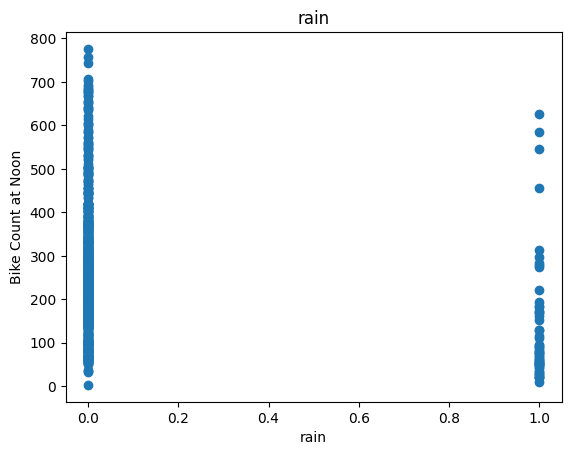

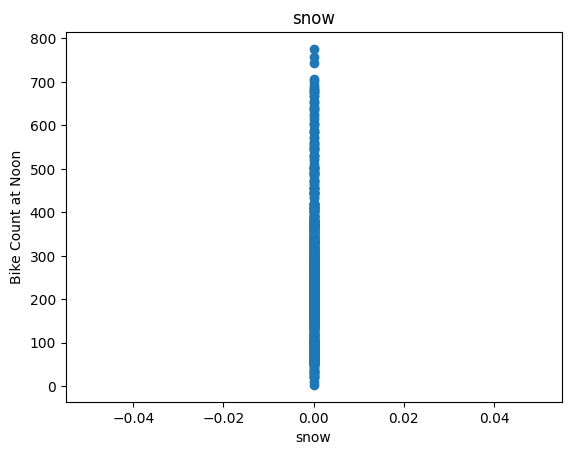

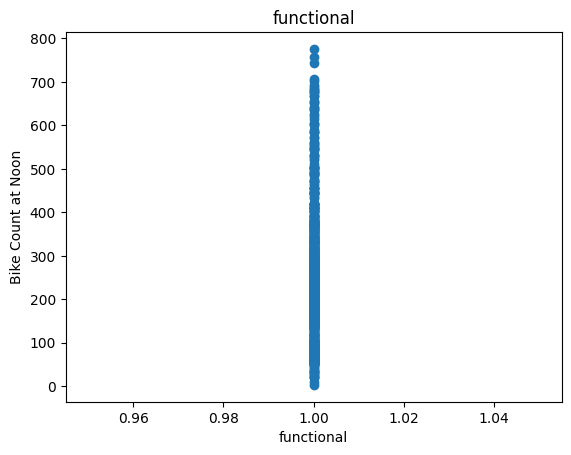

In [77]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [78]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/drosa/Documents/dataScience/PythonDataScienceHandbook/dataBookPython/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [79]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [80]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [81]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [82]:
temp_reg.score(X_test_temp,y_test_temp)

0.14584284806032033

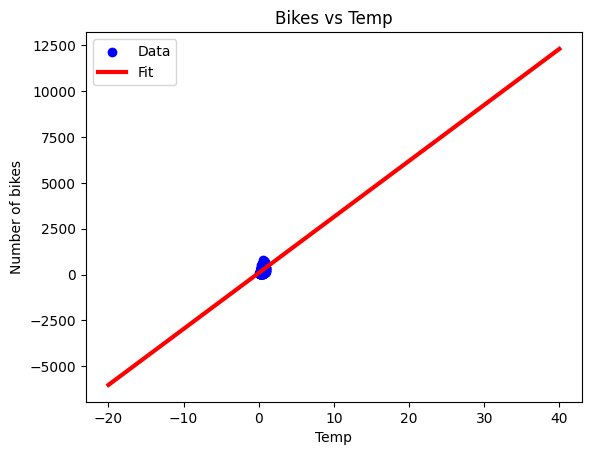

In [83]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# CYTHON

In [15]:
import cython 
import numpy as np 
 

ModuleNotFoundError: No module named 'cython'

To run parallel code in **Cython** using **OpenMP**, follow these key steps:

---

### ✅ 1. **Enable OpenMP in Your Cython Code**

Use the `prange` function (parallel range) from `cython.parallel`, and use OpenMP-specific settings in your `.pyx` file.

```cython
# example.pyx
from cython.parallel import prange
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
def parallel_sum(double[:] arr):
    cdef Py_ssize_t i, n = arr.shape[0]
    cdef double result = 0.0

    # Declare thread-local storage
    cdef double temp = 0.0

    # Use OpenMP parallel loop
    for i in prange(n, nogil=True, schedule='static'):
        temp += arr[i]

    # Critical section (non-threaded reduction for simplicity)
    with gil:
        result = temp

    return result
```

---

### ✅ 2. **Setup `setup.py` to Compile with OpenMP**

You must compile your Cython code with the `-fopenmp` flag.

```python
# setup.py
from setuptools import setup
from Cython.Build import cythonize
from setuptools.extension import Extension
import numpy

extensions = [
    Extension(
        "example",
        ["example.pyx"],
        extra_compile_args=["-fopenmp"],
        extra_link_args=["-fopenmp"],
        include_dirs=[numpy.get_include()]
    )
]

setup(
    ext_modules=cythonize(extensions)
)
```

Compile it:

```bash
python setup.py build_ext --inplace
```

---

### ✅ 3. **Use the Compiled Module in Python**

```python
import numpy as np
import example

arr = np.random.rand(1000000).astype(np.float64)
print(example.parallel_sum(arr))
```

---

### ⚠️ Notes

* The `nogil=True` in `prange` allows true parallel execution.
* The `schedule='static'` can be changed to `'dynamic'` or others depending on your task.
* Reduction operations need careful handling. You can use OpenMP’s reduction directly if you do it in C, or manually accumulate results per thread.

---

### ✅ Optional: True OpenMP Reduction

For more optimized reduction, declare a `reduction` manually with OpenMP. Here's how:

```cython
from cython.parallel import prange
cimport cython
from libc.stdlib cimport malloc, free

@cython.boundscheck(False)
@cython.wraparound(False)
def parallel_sum_reduction(double[:] arr):
    cdef Py_ssize_t i, n = arr.shape[0]
    cdef double result = 0.0

    # OpenMP parallel region with reduction
    with nogil:
        for i in prange(n, reduction=+:result, schedule='static'):
            result += arr[i]

    return result
```

This method is faster and avoids manual reduction code.

---

Would you like a working `.pyx` and `setup.py` example file to try directly?


Sure! Here's a complete working example for running parallel code using **Cython** with **OpenMP**.

---

## 📄 `parallel_sum.pyx`

This file uses OpenMP with `prange` and a proper OpenMP-style reduction:

```cython
# parallel_sum.pyx

from cython.parallel import prange
cimport cython
import numpy as np
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def parallel_sum(np.ndarray[np.double_t, ndim=1] arr):
    cdef Py_ssize_t i, n = arr.shape[0]
    cdef double result = 0.0

    # OpenMP reduction with prange
    with nogil:
        for i in prange(n, reduction=+:result, schedule='static'):
            result += arr[i]

    return result
```

---

## ⚙️ `setup.py`

This script builds the `.pyx` file with OpenMP enabled:

```python
# setup.py

from setuptools import setup, Extension
from Cython.Build import cythonize
import numpy

ext_modules = [
    Extension(
        "parallel_sum",
        ["parallel_sum.pyx"],
        extra_compile_args=["-fopenmp"],
        extra_link_args=["-fopenmp"],
        include_dirs=[numpy.get_include()]
    )
]

setup(
    name="parallel_sum",
    ext_modules=cythonize(ext_modules, language_level=3),
)
```

---

## 🧪 How to Build and Run

### ✅ 1. Save the files

* `parallel_sum.pyx`
* `setup.py`

in the same folder.

### ✅ 2. Build the extension

```bash
python setup.py build_ext --inplace
```

### ✅ 3. Test it in Python

```python
# test_parallel_sum.py
import numpy as np
import parallel_sum

arr = np.random.rand(1_000_000).astype(np.float64)
result = parallel_sum.parallel_sum(arr)
print("Sum:", result)
print("Expected:", arr.sum())
```

You should see that the result is very close to `arr.sum()`.

---

Let me know if you're on Windows or using a specific compiler—there are small differences for OpenMP support on various platforms.
